### Import required libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re

warnings.filterwarnings('ignore')
sns.set()

### User defined functions

In [3]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if hue!=None:
      count = data[hue].nunique()
      
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hue,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

def bar_box_plot(data, x, y):
  """
  plot Barplot and Boxplot on same figure in 2 subplots

  data: dataframe
  x: x column
  y: y column
  """
  plt.figure(figsize=(15, 5))

  plt.subplot(1, 2, 1)
  sns.barplot(data=data, y=y, x=x)
  plt.xticks(rotation=90)

  plt.subplot(1, 2, 2)
  sns.boxplot(data=data, y=y, x=x)
  plt.xticks(rotation=90)

  plt.show()

### Load the data file

In [4]:
data = pd.read_csv('/content/drive/MyDrive/PGP_AIML/csvfiles/laptop_price.csv')
copy = data.copy()

In [5]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Dataset has 1303 rows and 13 columns


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,NaN,NaN,NaN,660.155794,381.172104,1.0,331.5,659.0,990.5,1320.0
Company,1303,19,Dell,297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,1303,618,XPS 13,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeName,1303,6,Notebook,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Inches,1303.0,NaN,NaN,NaN,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4
ScreenResolution,1303,40,Full HD 1920x1080,507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ram,1303,9,8GB,619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memory,1303,39,256GB SSD,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gpu,1303,110,Intel HD Graphics 620,281,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Details from dataset

* Laptopia has laptops from **19 unique companies**
* Laptopia has **6 unique laptop types** across all the companies
* Max laptops are of **Notebook** type 
* Laptops are cofigured with **9 differnt sizes of RAM**
* Laptop prices ranges between **174 & 6099**


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### Datatype deatils

* Screen Size and Prices (Euros) are numeric values rest all vlues are Object type
* Lookiing at Not-Null count there are **NO NULL** values in the dataset

In [8]:
data.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [9]:
print(f'RAM unique values: {data.Ram.unique()}')
print(f'RAM unique values: {data.Memory.unique()}')

RAM unique values: ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
RAM unique values: ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


In [10]:
# Add new column for memory by removing GB from the values
data['RAM_GB'] = data.Ram.apply(lambda x: re.sub('[A-Za-z]{2}', '', x))

In [11]:
data.RAM_GB = data.RAM_GB.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  RAM_GB            1303 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 142.6+ KB


### 1. Laptops counts across the different companies

In [12]:
data.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

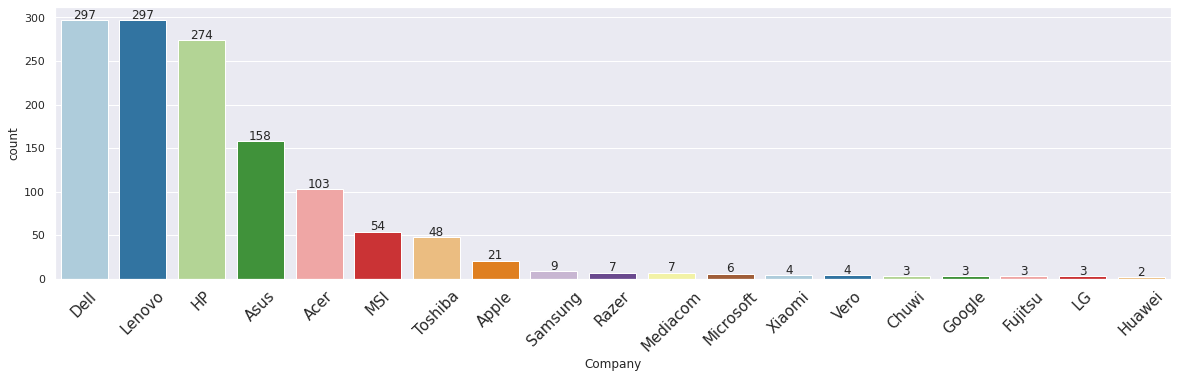

In [13]:
labeled_barplot(data, 'Company')

* Maximum laptops are from **DELL (297), Lenovo (297), HP (274)** 
* Asus (103) and Acer (54) are the companies which hava relatively large numer other than above 3 companies

### 2. Price variaton across the different companies

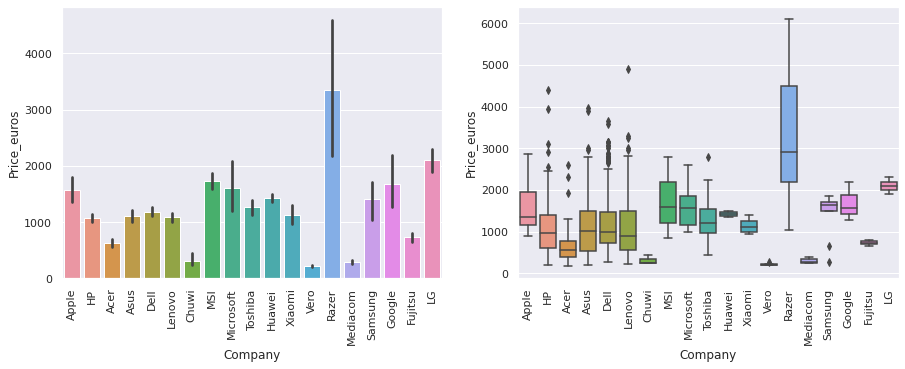

In [14]:
bar_box_plot(data, data.Company, data.Price_euros)

* Razor company's Laptops are high prices laptopd amoungst all companies
* Average price of Razor company's Laptops is almost same as upper whisker of all other company laptops 
* Other than Razor laptops, Apple & MSI laptops have comparatively high prices 
* HP, ASUS, Lenovo and DELL prices are almost in range same and average prices are also same  

### 3. price variaton across the different types of laptops

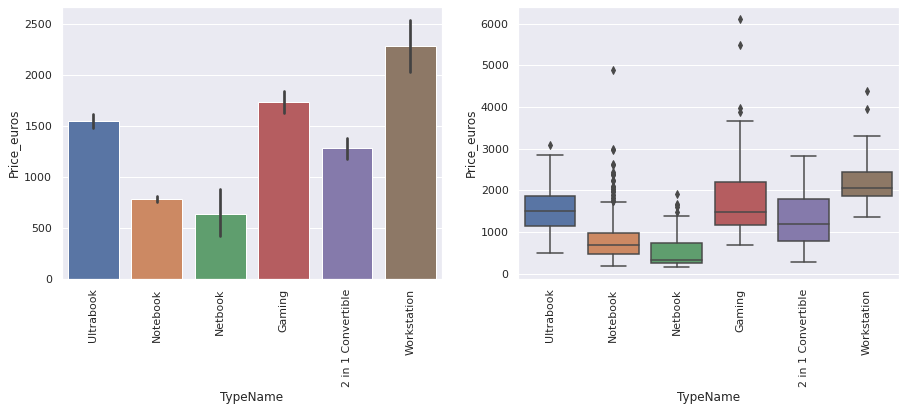

In [15]:
bar_box_plot(data, data.TypeName, data.Price_euros)

* **Netbook** type laptops have **lowest** prices
* **Gaming** type has **highest** price in terms of outliers and upper whisker

### 4. Amount of RAM variation across all company's gaming laptops

In [16]:
# Create gaming dataframe
df_gaming = data[data['TypeName'] =='Gaming']
df_gaming.groupby('Company')['RAM_GB'].mean()

Company
Acer      12.000000
Asus      14.962963
Dell      15.800000
HP        11.000000
Lenovo    12.375000
MSI       13.037037
Razer     22.400000
Name: RAM_GB, dtype: float64

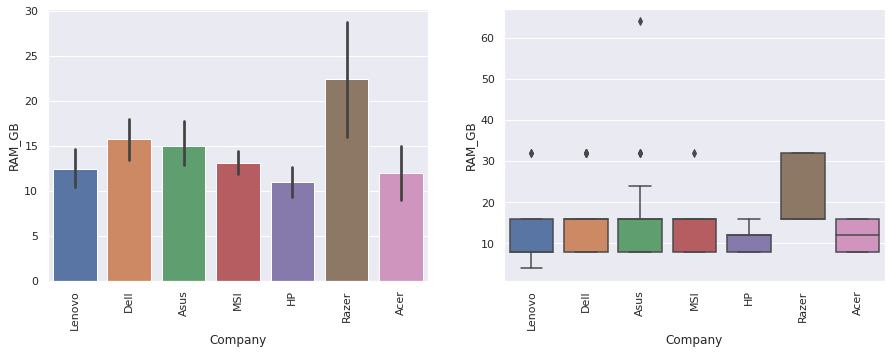

In [17]:
bar_box_plot(df_gaming, df_gaming.Company, df_gaming.RAM_GB)

* Razer company's laptop has higest RAM configuration
* High RAM configuration justifis the high prices for Razer company's laptop 

### 5. GPU and Price Variation

In [18]:
#Create NVidia Dataframe
df_gaming_nvidia = df_gaming[df_gaming.Gpu.str.contains('Nvidia GeForce GTX')]
df_gaming_nvidia.groupby('Company')['Price_euros'].mean()

Company
Acer      1468.125000
Asus      1743.658980
Dell      1918.393000
HP        1394.545455
Lenovo    1339.612258
MSI       1708.717736
Razer     4119.000000
Name: Price_euros, dtype: float64

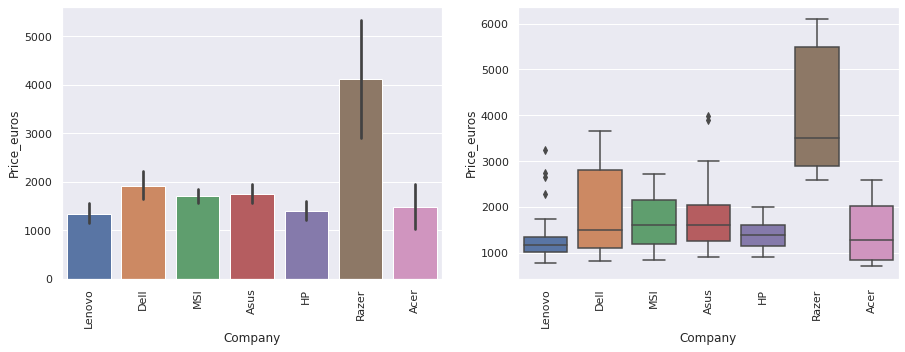

In [19]:
bar_box_plot(df_gaming_nvidia, df_gaming_nvidia.Company, df_gaming_nvidia.Price_euros)

* Lenovo, HP and Acer have cheaper gaming laptops
* Razer gaming laptops are expensive

In [20]:
# Clear up memory by deleting gaming and nVidia data frames
del df_gaming, df_gaming_nvidia

### 6. Wight across laptop companies for Ultrabooks

In [21]:
x = data['Weight'].shape[0]
y = data[(data.Weight.str.contains('kg'))]['Weight'].shape[0]
if (x==y):
  print(f'Weight columns contains only KG string as unit of weight (x, y) ({x}, {y})')

Weight columns contains only KG string as unit of weight (x, y) (1303, 1303)


In [22]:
data['Weight_KG'] = data['Weight'].apply(lambda x: re.sub('[a-zA-Z]{2}', '' ,x))
data['Weight_KG'] = data['Weight_KG'].astype('float64')

In [23]:
df_ultrabook = data[data.TypeName == 'Ultrabook']
df_ultrabook.groupby('Company')['Weight_KG'].mean()

Company
Acer         1.530000
Apple        1.320476
Asus         1.322000
Dell         1.381837
Google       1.100000
HP           1.424722
Huawei       1.050000
LG           1.050000
Lenovo       1.376774
Microsoft    1.251333
Razer        1.270000
Samsung      1.066000
Toshiba      1.232500
Xiaomi       1.290000
Name: Weight_KG, dtype: float64

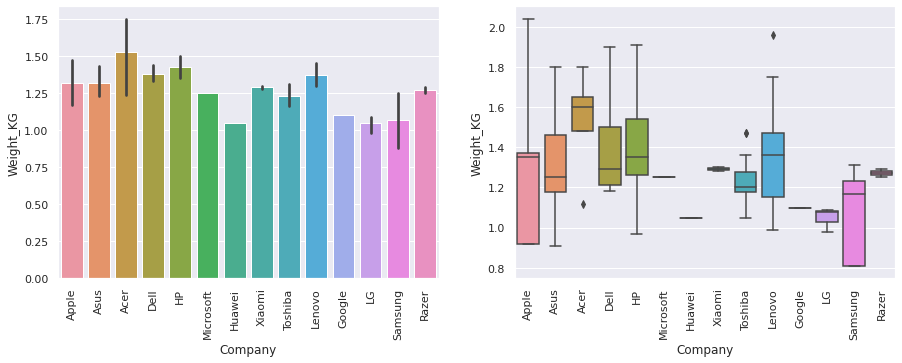

In [24]:
bar_box_plot(df_ultrabook, df_ultrabook.Company, df_ultrabook.Weight_KG)

* **Apple and Samsung** Ultrabook have weight **below 1 KG**
* Acer Ultrabooks are most heaviset 
* Asus, Lenovom and HP fall in almost same weight category

In [25]:
data.Inches.value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

### 7. Windows OS Small Laptops



In [26]:
df_windows = data[data.OpSys.str.contains('Windows')]
df_windows = df_windows[df_windows.Inches <= 14]
df_windows.Company.value_counts()

Lenovo       114
HP           104
Dell          77
Asus          38
Toshiba       29
Acer          20
Mediacom       7
Microsoft      6
Razer          5
Vero           4
Samsung        3
Huawei         2
MSI            2
Chuwi          1
Xiaomi         1
LG             1
Name: Company, dtype: int64

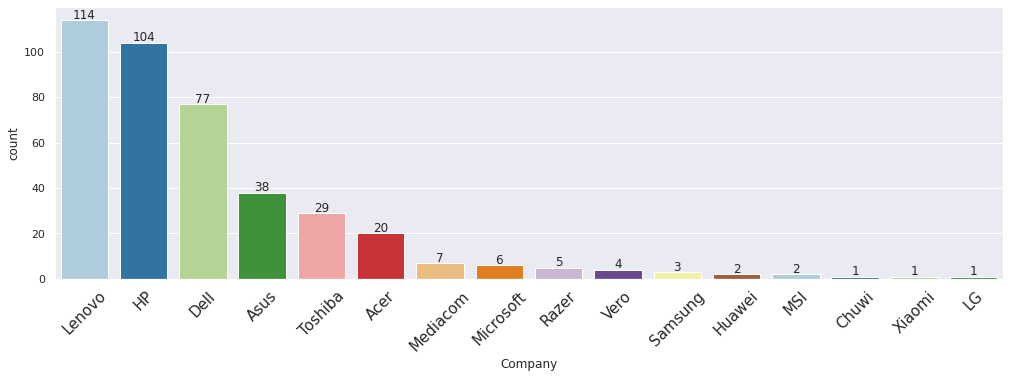

In [27]:
labeled_barplot(df_windows, 'Company')

* **Lenovo (114), HP (104) and Dell (71)** has high number of laptops with Windows OS and Screen size les that 14 inches

### 8. Linux and Chrome OS Laptops

In [28]:
data.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [29]:
df_lnx_chrm = data[data.OpSys.str.contains('Linux|Chrome')]
df_lnx_chrm.groupby(['OpSys',  'Company'])['Product'].count()

OpSys      Company
Chrome OS  Acer       11
           Asus        3
           Dell        1
           Google      3
           HP          4
           Lenovo      3
           Samsung     2
Linux      Acer       16
           Asus       10
           Dell       36
Name: Product, dtype: int64

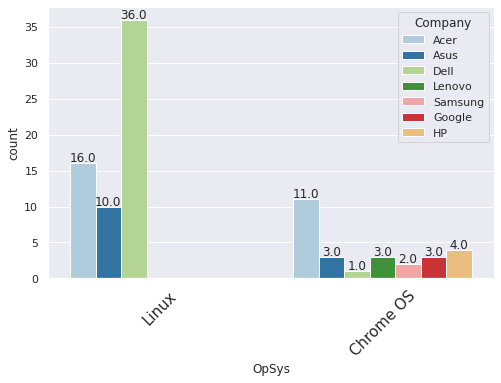

In [30]:
labeled_barplot(df_lnx_chrm, 'OpSys', hue='Company')

* **Dell (36)** has high number of laptops with Linux OS
* **Acer(11)** has high number of laptops with Chrom OS

### 9. Company wise laptpos with High Resolutoin Screerns 

In [31]:

data['resolution1'] = data.ScreenResolution.apply(lambda x: re.search(r'\d{3,4}[xX]\d{3,4}', x).group().split('x')[0])
data['resolution2'] = data.ScreenResolution.apply(lambda x: re.search(r'\d{3,4}[xX]\d{3,4}', x).group().split('x')[1])
data['resolution1'] = data['resolution1'].astype('int64')
data['resolution2'] = data['resolution2'].astype('int64')
data[(data['resolution1'] > 1600) & (data['resolution2'] >= 900)].groupby('Company')['Product'].count().sort_values(ascending=False)

Company
Lenovo       231
Dell         226
HP           195
Asus         116
MSI           54
Acer          51
Toshiba       33
Apple         16
Samsung        8
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Google         3
LG             3
Chuwi          3
Vero           3
Huawei         2
Name: Product, dtype: int64

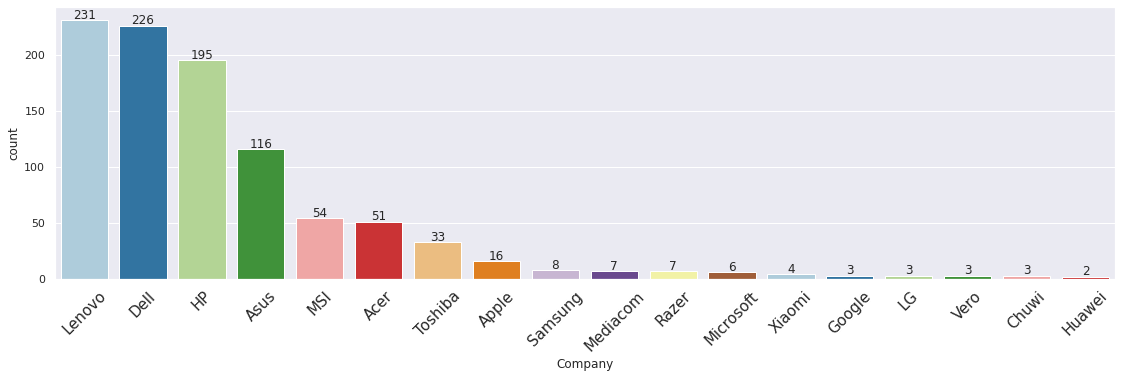

In [32]:
labeled_barplot(data[(data['resolution1'] > 1600) & (data['resolution2'] >= 900)], 'Company')

* **Lenovo (231),  Dell (226) and HP (195)** have highest laptops with screen resolutoin > 1600X900

### 10 Company wise Percentage of High resolution screens 

In [33]:
# Creat Dataframes
x = data[(data['resolution1'] > 1600) & (data['resolution2'] >= 900)].groupby('Company')['Product'].count().sort_values(ascending=False)
df_hr_comp = pd.DataFrame({'Company':x.index, 'Count':x.values})
df_comp = pd.DataFrame({'Company':data.Company.value_counts().index, 'Count':data.Company.value_counts().values})
# Set Companyas Index
df_comp = df_comp.set_index('Company')
df_hr_comp = df_hr_comp.set_index('Company')

In [34]:
# Calculate the 
df_hr_comp['percent'] = round(df_hr_comp.Count / df_comp.Count * 100, 0).sort_values(ascending=True)
df_hr_comp.sort_values(by='percent')

,Count,percent
Company,,
Acer,51,50.0
Toshiba,33,69.0
HP,195,71.0
Asus,116,73.0
Vero,3,75.0
Dell,226,76.0
Apple,16,76.0
Lenovo,231,78.0
Samsung,8,89.0


* 50% of Acer Laptops have high resolution
* 100% laptops frrom Razor and MSI have hig resolutoin which justifies their high price range  

### 11 Intel and AMD Processor Speed for Notebook types

In [97]:
data['speed'] = data.Cpu.str.rsplit().str[-1]

In [99]:
data['CpuManuf'] = data.Cpu.str.split().str[0]


In [100]:
data.speed = data['speed'].apply(lambda x: re.sub('[A-Za-z]{3}', " ", x))
data.speed = data.speed.astype('float64')

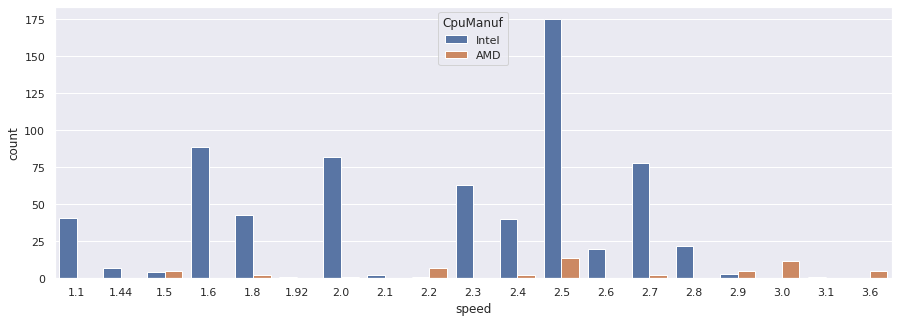

In [101]:
plt.figure(figsize=(15,5))
sns.countplot(data=data[data.TypeName=='Notebook'], x='speed', hue='CpuManuf')

In [102]:
df_notebook = data[data.TypeName=='Notebook']

In [104]:
df_notebook.groupby(['CpuManuf'])['speed'].mean()

CpuManuf
AMD      2.585455
Intel    2.184077
Name: speed, dtype: float64

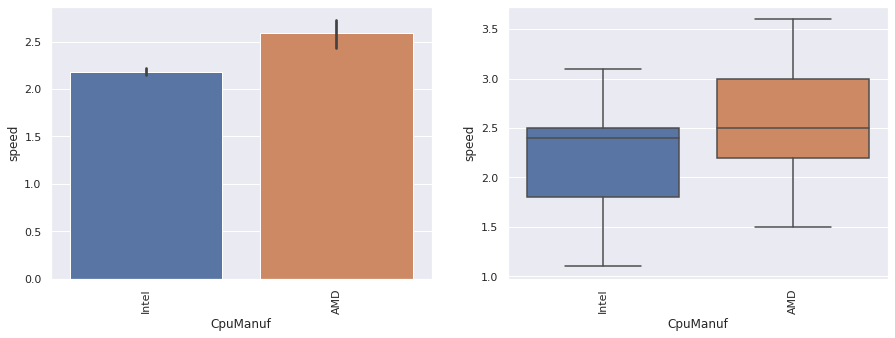

In [105]:
bar_box_plot(df_notebook, 'CpuManuf', 'speed')

* Intel has slow notebooks with speed **below 1GHz**
* Notebooks with **AMD CPU** are **faster** compared Notebooks Intel CPU

### 12 Storage types for Apple Laptops

In [114]:
# Create dataframe for compnay - apple 
df_apple = data[data.Company=='Apple']


In [129]:
# Check Memory data for apple dataframe
df_apple.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '512GB SSD', '256GB SSD',
       '256GB Flash Storage', '512GB Flash Storage'], dtype=object)

In [125]:
# Create columns for storage size and type 
df_apple['strg_size'] = df_apple.Memory.str.split(n=1).str[0]
df_apple['strg_type'] = df_apple.Memory.str.split(n=1).str[1]

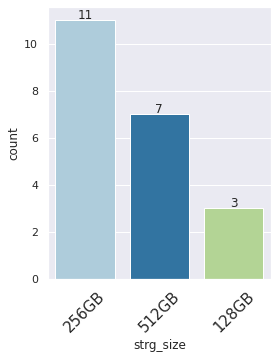

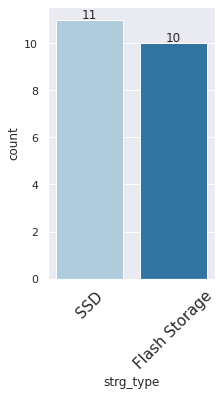

In [128]:
labeled_barplot(df_apple, 'strg_size')
labeled_barplot(df_apple, 'strg_type')

* Apple has 3 types od storage sizes: **256GB (11), 512GB(7) & 128GB()3**
* Most apple laptops are configured with **256GB Storage** size
* Apple provides SSD and Flash Storage types for memory